**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2025 - Cátedra Mindlin
# **Trabajo Práctico 1**

Este es el trabajo práctico del 1er eje temático. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **martes 30 de septiembre, inclusive**. El trabajo es en **grupos de entre 2 y 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP1IMC2025_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte dinámica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.

---
# Ejercicio 1

Sea el siguiente sistema dinámico unidimensional

$$
\dot{x} = -x + S(\rho+cx)
$$

con

$$
S(\rho+cx)=\frac{1}{1+e^{-(\rho+cx)}}
$$

donde la función $S(\rho+cx)$ es la función sigmoidea con la entrada parametrizada en base a los parámetros $\rho$ y $c$.

1.1. Defina una función de Python que refleje los valores de la función sigmoidea en base a un valor de x, incluyendo la posibilidad de definir los parámetros como argumento de entrada. Considere por default los valores de parámetros para que el resultado sea la función $S(x)$.

1.2. Estudie gráficamente la incidencia de los parámetros $\rho$ y $c$ en la forma funcional de la sigmoidea. Qué efecto tiene cada parámetro?

1.3. Estudie gráficamente la posibilidad de existencia de puntos fijos del sistema para c=10.

1.4. Usando las herramientas numéricas, busque los puntos fijos del sistema para c=10 y distintos valores de $\rho$ elegidos criteriosamente en base al ejercicio anterior. Recuerde aplicar alguna estrategia para limpiar artefactos en las raíces encontradas si los hubiese, como por ejemplo, pedir que el campo vector evaluado en la raíz sea menor a una cierta cota tolerada. Analice su estabilidad a partir de la derivada numérica. Haga un diagrama de bifurcaciones para los valores de $\rho$ elegidos. Qué tipo de bifurcaciones encuentra?

1.5. Considerando que las bifurcaciones separan regiones que definen comportamientos del sistema cualitativamente distintos. Para c=10, elija un valor de $\rho$ dentro de cada una de esas regiones como caso representativo de la dinámica asociada. Tengan en cuenta que no es necesario que busquen exactamente dónde están las bifurcaciones, con elegir valores de $\rho$ que me caractericen cada región y su dinámica ya es suficiente. Para cada uno de estos valores de $\rho$, estudie distintas soluciones del sistema, obtenidas de integrar con el método de Euler, para distintos valores iniciales. Cómo interpreta las trayectorias encontradas y cómo las relaciona con los resultados previos?

1.6. Usando la estrategia de integrar hacia atrás, muestre que las trayectorias obtenidas efectivamente se comportan de la manera esperada para algún punto fijo inestable del sistema, reforzando los resultados de los sub-ejercicios previos. Como consejo, piensen en las condiciones iniciales que utilizan.


In [172]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import root_scalar
#import numdifftools as nd

In [173]:
#1.1

def s(x, p=0, c=1):
    exponent = -(p + c * x)
    return 1 / (1 + np.exp(exponent))

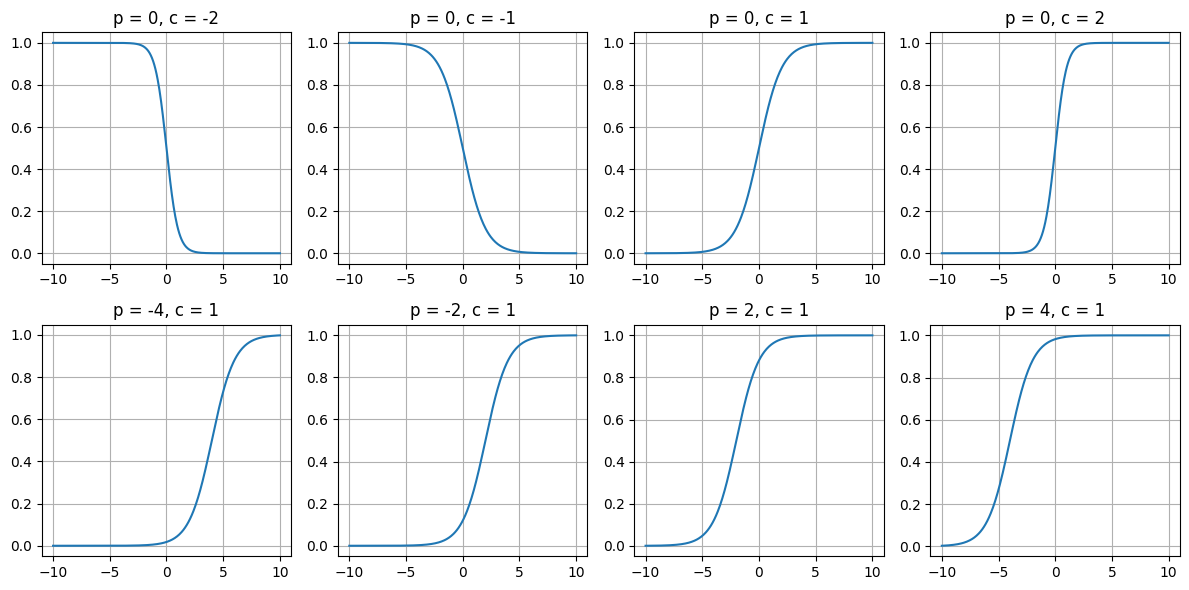

In [174]:
#1.2
#usando las herramientas numéricas, busque los puntos fijos del sistema para c=10
#y distintos valores de ρ elegidos criteriosamente en base al ejercicio anterior. 
# Recuerde aplicar alguna estrategia para limpiar artefactos en las raíces encont
x = np.linspace(-10, 10, 400)
valores_c = [-2, -1, 1, 2]
valores_p = [-4, -2, 2, 4]

# Gráficos variando c
plt.figure(figsize=(12, 6))
for i, c in enumerate(valores_c):
    y = s(x, 0, c)
    plt.subplot(2, 4, i+1)
    plt.plot(x, y)
    plt.title(f'p = {0}, c = {c}')
    plt.grid(True)

# Gráficos variando p
for i, p in enumerate(valores_p):
    y = s(x, p, 1)
    plt.subplot(2, 4, i+5)
    plt.plot(x, y)
    plt.title(f'p = {p}, c = {1}')
    plt.grid(True)

plt.tight_layout()
plt.show()

Observo que el parámetro p afecta el corrimiento en eje x. Esto es, cuando más grande sea p, más se desplazará el gráfico hacia la izquierda. Asimismo, el parámetro c afecta la velocidad de crecimiento de la función. Si c es negativo, la función será decreciente. Si es positivo, es creciente.

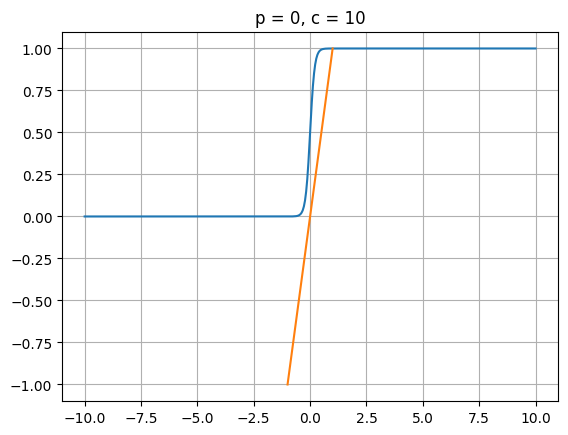

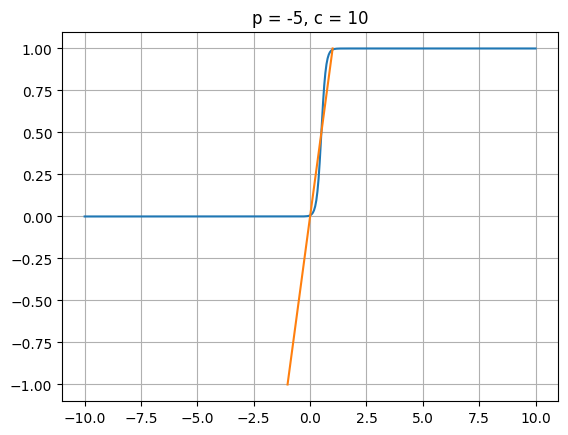

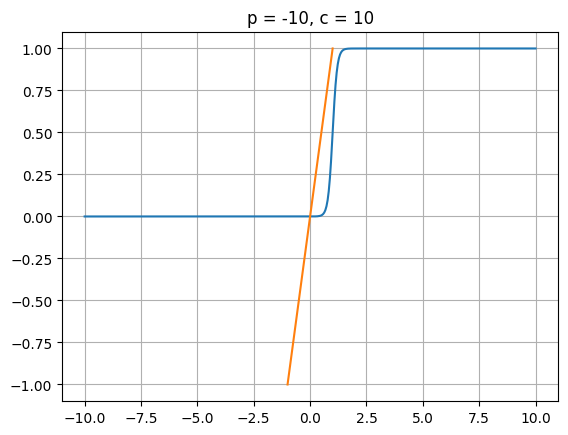

In [175]:
#1.3
x1 = np.linspace(-1, 1, 400)
y1 = x1

x1 = np.linspace(-1, 1, 400)
y = s(x, 0, 10)
plt.plot(x, y)
plt.title(f'p = {0}, c = {10}')
plt.grid(True)
plt.plot(x1, y1)
plt.show()

x1 = np.linspace(-1, 1, 400)
y = s(x, -5, 10)
plt.plot(x, y)
plt.title(f'p = {-5}, c = {10}')
plt.grid(True)
plt.plot(x1, y1)
plt.show()

x1 = np.linspace(-1, 1, 400)
y = s(x, -10, 10)
plt.plot(x, y)
plt.title(f'p = {-10}, c = {10}')
plt.grid(True)
plt.plot(x1, y1)
plt.show()


Observamos que, en función del valor de p (el desplazamiento horizontal), podría haber entre 1 y 3 puntos fijos inclusive.


In [176]:
#1.4
def f(x,p,c):
  return -x + s(x,p,c)

a=0
sol = root_scalar(lambda x : f(x,a,10), method='secant', x0=0, x1=2)
print("Raíz encontrada:", sol.root)

a=-5
sol = root_scalar(lambda x : f(x,a,10), method='secant', x0=-1, x1=0.3)
print("Raíz encontrada:", sol.root)
sol=root_scalar(lambda x : f(x,a,10), method='secant', x0=0.3, x1=0.6)
print("Raíz encontrada:", sol.root)
sol=root_scalar(lambda x : f(x,a,10), method='secant', x0=0.6, x1=0.2)
print("Raíz encontrada:", sol.root)
a=-10
sol = root_scalar(lambda x : f(x,a,10), method='secant', x0=-1, x1=1)
print("Raíz encontrada:", sol.root)



Raíz encontrada: 0.999954581508524
Raíz encontrada: 0.0071880641826713556
Raíz encontrada: 0.5000000000000001
Raíz encontrada: 0.9928119358173283
Raíz encontrada: 4.5418491475998026e-05


Vemos que tenemos los siguientes puntos fijos:

Para p=0: x=1

Para p=-5: x=0, 0.5 y 1

Para p=-10: x=0

Ahora procedemos a estudiar su estabilidad mediante el análisis de su derivada.


In [177]:
"""# Análisis de estabilidad de los puntos fijos

f0 = lambda x: -x + s(x,0,10)
f1 = lambda x: -x + s(x,-5,10)
f2 = lambda x: -x + s(x,-10,10)

df0 = nd.Derivative(f0)
df1 = nd.Derivative(f1)
df2 = nd.Derivative(f2)

puntosfijos = {
    0: [1],
    -5: [0, 0.5, 1],
    -10: [0]
}

for p in [0,-5,-10]:
    print(f"Estabilidad para p = {p}")
    if p in puntosfijos:
        for i in puntosfijos[p]:
            if p == 0:
                derivada = df0(i)
            elif p == -5:
                derivada = df1(i)
            elif p == -10:
                derivada = df2(i)

            print(f"Punto fijo: {i}, Derivada: {derivada:.4f}")

            if derivada < 0:
                print("Estable")
            elif derivada > 0:
                print("Inestable")
            else:
                print("La derivada es 0; no tenemos información suficiente")"""

'# Análisis de estabilidad de los puntos fijos\n\nf0 = lambda x: -x + s(x,0,10)\nf1 = lambda x: -x + s(x,-5,10)\nf2 = lambda x: -x + s(x,-10,10)\n\ndf0 = nd.Derivative(f0)\ndf1 = nd.Derivative(f1)\ndf2 = nd.Derivative(f2)\n\npuntosfijos = {\n    0: [1],\n    -5: [0, 0.5, 1],\n    -10: [0]\n}\n\nfor p in [0,-5,-10]:\n    print(f"Estabilidad para p = {p}")\n    if p in puntosfijos:\n        for i in puntosfijos[p]:\n            if p == 0:\n                derivada = df0(i)\n            elif p == -5:\n                derivada = df1(i)\n            elif p == -10:\n                derivada = df2(i)\n\n            print(f"Punto fijo: {i}, Derivada: {derivada:.4f}")\n\n            if derivada < 0:\n                print("Estable")\n            elif derivada > 0:\n                print("Inestable")\n            else:\n                print("La derivada es 0; no tenemos información suficiente")'

---
# Ejercicio 2

Sea el siguiente sistema 2D

$$
\dot{x} = - x - x^{2} - y \\
\dot{y} = x - y
$$

2.1. Defina el sistema con una función de Python.

2.2. Busque puntos fijos a partir del estudio gráfico de las nulclinas. Para el gráfico de las nulclinas use `plt.contour` para levels=[0].

2.3. Busque numéricamente los puntos fijos con `fsolve` de Scipy.

2.4. Defina una función de Python genérica que tenga la matriz Jacobiana en función de valores de "x" e "y". Evalúe la matriz en los puntos fijos y estudie su estabilidad. Qué tipo de puntos fijos son?

2.5. Grafique el campo vector usando `plt.streamplots`. Interprete las líneas de campo obtenidas en referencia al item anterior.

2.6. Encuentre trayectorias en el espacio de fases que describan comportamientos del sistema. Para esto resuelva el sistema, usando `solve_ivp`. Use pasos largos, tiempos de integración muy cortos. Elija estos valores y las condiciones iniciales criteriosamente, de manera tal de reforzar los resultados previos, mostrando qué tipos de elementos dinámicos presenta el sistema en base a sus observaciones.

## 2.1 Defino la función como fun()

In [178]:
def fun(z):
    x = z[0]
    y = z[1]
    dx = -x -x**2 - y
    dy = x - y
    return [dx, dy]

## 2.2 Grafico las nulclinas

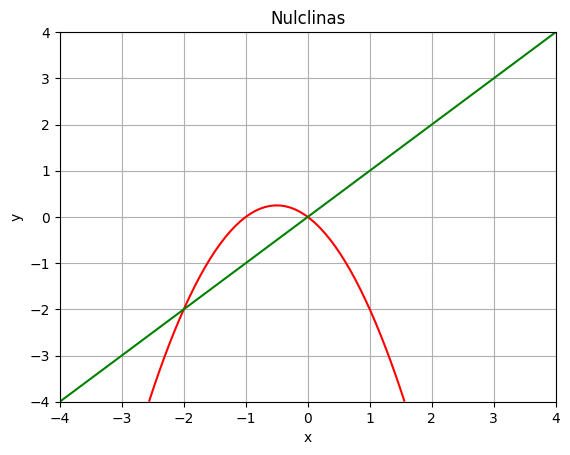

In [179]:
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
XX, YY = np.meshgrid(x, y)
DX, DY = fun([XX, YY])
plt.contour(XX, YY, DX, levels=[0], colors=['r'])
plt.contour(XX, YY, DY, levels=[0], colors=['g'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nulclinas')
plt.grid()
plt.show()

Se puede observar que existen dos puntos fijos que corresponden a las intersecciones entre las curvas

## 2.3 Busco los puntos fijos          

In [180]:
N = 50
x0s = np.random.uniform(low=-2, high=2, size=(N,))
y0s = np.random.uniform(low=-2, high=2, size=(N,))
raices_encontradas = []
for x0, y0 in zip(x0s, y0s):
    z0 = [x0, y0]
    raices_encontradas.append(sp.optimize.fsolve(fun, z0))
raices = np.unique(np.array(raices_encontradas).round(2), axis=0)
print("Puntos fijos: ",raices[0],raices[1])

Puntos fijos:  [-2. -2.] [0. 0.]


c:\Users\r3ch1\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


## 2.4 Analizo la estabilidad de los 2 puntos fijos

In [181]:
# Defino la matriz Jacobiana de mi sistema
def J(z):
    x = z[0]
    y = z[1]
    return np.array([[-1 - 2*x, -1],
                     [1, -1]])

# Defino la función que clasifica la estabilidad de los puntos fijos
# dada la función de la matriz Jacobiana y las raíces encontradas
def clasificador_estabilidad(matriz_jacobiana,raices):
    for r in raices:
        # Evaluo la matriz Jacobiana en el punto fijo
        J_r = J(r)

        # Calculo los autovalores y de paso los autovectores
        eigenvalues, eigenvectors = np.linalg.eig(J_r)

        print(f"Punto fijo: {r}")
        print(f"Autovalores: {eigenvalues}")

        # Autovalores reales
        if np.all(np.imag(eigenvalues) == 0):
            if eigenvalues[0] == eigenvalues[1]:
                print ("Estrella o nodo degenerado")
            elif eigenvalues[0] < 0 and eigenvalues[1] < 0:
                print("Nodo atractor")
            elif eigenvalues[0] > 0 and eigenvalues[1] > 0:
                print("Nodo repulsor")
            else:
                print("Punto silla")

        # Autovalores complejos
        elif np.any(np.real(eigenvalues) > 0):
            print("Foco inestable")
        elif np.all(np.real(eigenvalues) < 0):
            print("Foco estable")
        else:
            print("Centro")

# Finalmente llamo a la función para clasificar la estabilidad de los puntos fijos
clasificador_estabilidad(J,raices)

Punto fijo: [-2. -2.]
Autovalores: [ 2.73205081 -0.73205081]
Punto silla
Punto fijo: [0. 0.]
Autovalores: [-1.+1.j -1.-1.j]
Foco estable


Podemos ver que el punto fijo (-2,-2) tiene dos autovalores reales distintos, uno positivo y otro negativo, lo que corresponde con un punto silla. El punto fijo (0,0) tiene autovalores complejos y su parte real es negativa lo que corresponde a un foco estable (sumidero).

## 2.5 Grafico el campo vector

Text(0, 0.5, 'y')

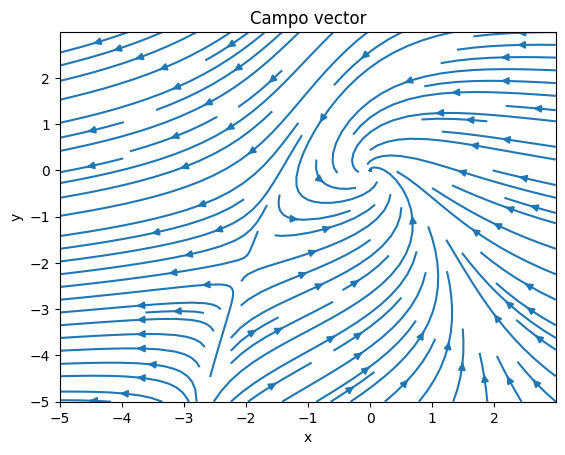

In [196]:
# Definimos una grilla de puntos
XX, YY = np.meshgrid(np.arange(-5, 3, .01), np.arange(-5, 3, .01))

# Calculamos el campo vector en cada punto
DX, DY = fun([XX, YY])

#Y finalmente graficamos
plt.streamplot(XX, YY, DX, DY, density=1, minlength=.1)
plt.title('Campo vector')
plt.xlabel('x')
plt.ylabel('y')

Grafico las nulclinas sobre el campo vector para apreciar cómo sobre cada una el flujo la atraviesa de forma horizontal (recta verde, dx/dt = 0) o de forma vertical (curva roja, dy/dt = 0)

Text(0, 0.5, 'y')

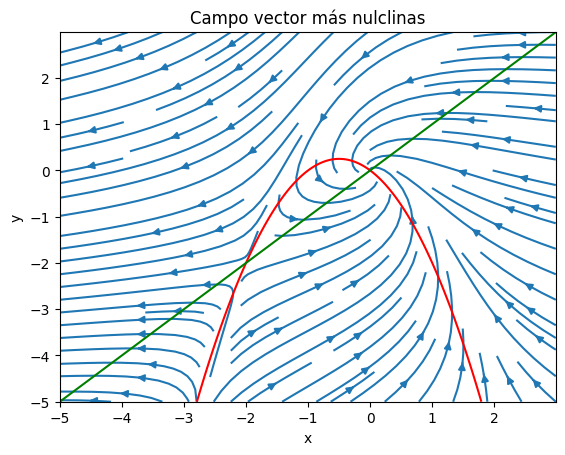

In [198]:
# Definimos una grilla de puntos
XX, YY = np.meshgrid(np.arange(-5, 3, .01), np.arange(-5, 3, .01))

# Calculamos el campo vector en cada punto
DX, DY = fun([XX, YY])

#Y finalmente graficamos
plt.streamplot(XX, YY, DX, DY, density=1, minlength=.1)

plt.contour(XX, YY, DX, levels=[0], colors=['r'])
plt.contour(XX, YY, DY, levels=[0], colors=['g'])

plt.title('Campo vector más nulclinas')
plt.xlabel('x')
plt.ylabel('y')

## 2.6 Grafico las trayectorias para algunas condiciones iniciales

Por último sería de ayuda ver las variedades estables e inestables globales del punto silla, ya que son estas las que ordenan el flujo. Además graficamos un par de trayectorias para ver que estas convergen o no al foco estable, segun de qué lado estan de una de las variedades globales del nodo silla. Las trayectorias que convergen al foco estable son las rosas y las que no son verdes.

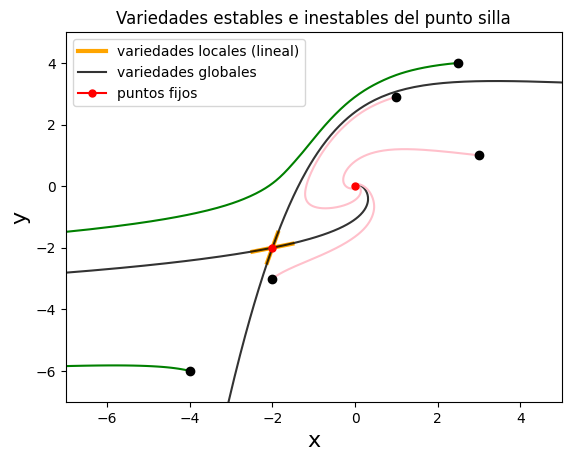

In [194]:
def fun_adaptada(t, z):
    return fun(z)

z0 = raices[0]

J_r = J(z0)
evals, evecs = np.linalg.eig(J_r)

# Desde aquí uso codigo para conseguir y graficar variedades locales y globales de la clase de laboratorio

# Parámetros de integración para trazar variedades globales
eps = 1e-3  # separación inicial desde el punto fijo a lo largo del autovector (pequeña)
T_forward = 20.0
T_backward = -20.0

manifolds = []  # guardaremos trayectorias para plotear

# función auxiliar para integrar desde z0 + s * v en tspan (solve_ivp admite t decreciente)
def integrate_from(z_init, t_span, dense_output=True):
    sol_variedades = sp.integrate.solve_ivp(fun_adaptada, t_span, z_init, atol=1e-9, rtol=1e-8, max_step=0.1)
    return sol_variedades

# Para cada autovector, integrar en las direcciones +/-
for i in range(evals.size):
    v = np.real(evecs[:, i])
    # dos direcciones (hacia +v y -v)
    for sign in [+1, -1]:
        z_init = z0 + sign * eps * v
        # si el eigenvalor es inestable (parte real positiva) integramos hacia adelante (0 -> T_forward)
        if np.real(evals[i]) > 0:
            sol_variedades = integrate_from(z_init, (0.0, T_forward))
        # si estable (parte real negativa) integramos hacia atrás (0 -> T_backward)
        else:
            sol_variedades = integrate_from(z_init, (0.0, T_backward))
        manifolds.append((i, sign, sol_variedades))

# Dibujar autovectores locales (líneas rectas) a pequeña escala
scale_local = 0.5
for i in range(evals.size):
    v = np.real(evecs[:, i])
    pts = np.array([z0 - scale_local*v, z0 + scale_local*v]).T
    plt.plot(pts[0], pts[1], color='orange', linewidth=3, label='variedades locales (lineal)')

# Dibujar las trayectorias integradas (variedades globales aproximadas)
for (i, sign, sol_variedades) in manifolds:
    traj = sol_variedades.y
    plt.plot(traj[0], traj[1], 'k', alpha=0.8, label='variedades globales')


## Esto es para plotear trayectorias de manera más sencilla

def plot_de_trayectoria(tmax,dt,z0,plotear_punto_inicial = True,retornar_punto_final = False,color = 'blue'):
    t = np.arange(0, tmax, step=dt)
    sol = sp.integrate.solve_ivp(fun_adaptada, [t[0], t[-1]], z0, t_eval=t, method='RK45')
    plt.plot(sol.y[0, :], sol.y[1, :],color=color)
    if plotear_punto_inicial == True:
         plt.plot(z0[0], z0[1], 'ko')
    if retornar_punto_final:
        return sol.y[0,-1], sol.y[1,-1]

def plot_de_trayectoria_futuro_mas_pasado(tmax,tpas,dt,z0,plotear_punto_inicial = True,color = 'blue'):
    plot_de_trayectoria(tmax,dt,z0,plotear_punto_inicial=False,color = color)
    punto_inicial = plot_de_trayectoria(-tpas,-dt,z0,False,retornar_punto_final=True,color = color)
    if plotear_punto_inicial:
        plt.plot(punto_inicial[0], punto_inicial[1], 'ko')

plot_de_trayectoria(3,0.01,[2.5,4],color='green')
plot_de_trayectoria(3,0.01,[-4,-6],color='green')
z0s = [[-2,-3],[3,1],[1,2.9]]
for z0 in z0s:
    plot_de_trayectoria(10,0.01,z0,color='pink')

# Ploteo autovectores
plt.plot(raices[0][0],raices[0][0], color='r', marker='o', markersize=5, label='puntos fijos')
plt.plot(raices[1][0],raices[1][0], color='r', marker='o', markersize=5, label='puntos fijos')


plt.xlim(-7, 5)
plt.ylim(-7, 5)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('Variedades estables e inestables del punto silla')
plt.show()

## 2.6 Grafico las trayectorias para algunas condiciones iniciales

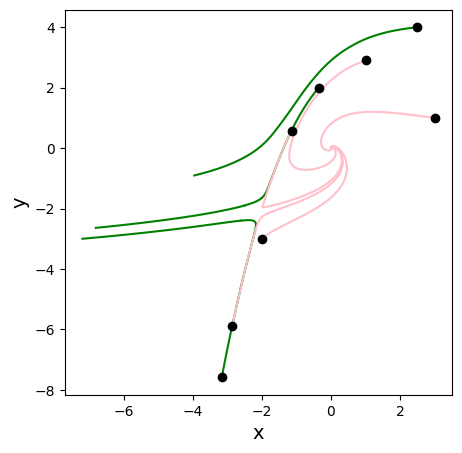

In [185]:


def plot_de_trayectoria(tmax,dt,z0,plotear_punto_inicial = True,retornar_punto_final = False,color = 'blue'):
    t = np.arange(0, tmax, step=dt)
    sol = sp.integrate.solve_ivp(fun_adaptada, [t[0], t[-1]], z0, t_eval=t, method='RK45')
    plt.plot(sol.y[0, :], sol.y[1, :],color=color)
    if plotear_punto_inicial == True:
         plt.plot(z0[0], z0[1], 'ko')
    if retornar_punto_final:
        return sol.y[0,-1], sol.y[1,-1]

def plot_de_trayectoria_futuro_mas_pasado(tmax,tpas,dt,z0,plotear_punto_inicial = True,color = 'blue'):
    plot_de_trayectoria(tmax,dt,z0,plotear_punto_inicial=False,color = color)
    punto_inicial = plot_de_trayectoria(-tpas,-dt,z0,False,retornar_punto_final=True,color = color)
    if plotear_punto_inicial:
        plt.plot(punto_inicial[0], punto_inicial[1], 'ko')


plt.figure(figsize=(5,5))

z0s = [[-2,-3],[3,1],[1,2.9]]
for z0 in z0s:
    plot_de_trayectoria(10,0.01,z0,color='pink')

plot_de_trayectoria(2,0.01,[2.5,4],color='green')

plot_de_trayectoria_futuro_mas_pasado(0.5,4,0.01,[-2.6,-2.4],color='green')

plot_de_trayectoria_futuro_mas_pasado(0.5,4,0.01,[-2.5,-1.9],color='green')

plot_de_trayectoria_futuro_mas_pasado(3,7,0.01,[-1.7,-1.9],color='pink')

plot_de_trayectoria_futuro_mas_pasado(4,4,0.01,[-1.7,-2.1],color='pink')


plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

---
# Ejercicio 3

**Modelo SIR**

Para modelar la evolución de una infección en una población se la puede dividir en tres grupos: los *susceptibles* de contraer la enfermedad ($S$), los *infectados* ($I$) y los *recuperados* ($R$). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:

$$
\frac{dS}{dt} = -\beta \frac{S\,I}{N}\\
\frac{dI}{dt} = \beta \frac{S\,I}{N} - \gamma\, I\\
\frac{dR}{dt} = \gamma\, I
$$

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente y $N$ la población total.

3.1. Considerar que la población de $N = 10000$ habitantes e inicialmente todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta=0.2$ y un tiempo medio de recuperación de 10 días (es decir, una tasa $\gamma$ de 1/10). Si inicialmente hay una única persona enferma, discutir de qué forma deberían evolucionar las poblaciones de cada grupo. [Hint: considere que todas las personas que no están enfermas son susceptibles].

3.2. Asumiendo que no se producen fallecimientos, verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.

3.3. Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones llega a su máximo y comienza a descender (encontrar numéricamente, no "a ojo"). Mostrar cuál sería ese momento en la curva de I(t).

---

## 3.1

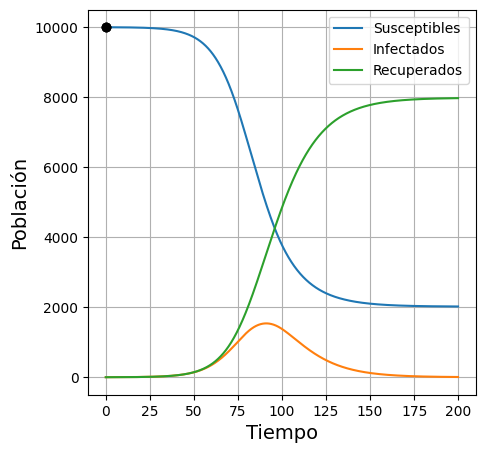

In [186]:
def SIR(t,s):
  b = 0.2
  y = 1/10
  N = 10000
  S = s[0]
  I = s[1]
  R = s[2]
  dS = -b*S*I/N
  dI = b*S*I/N -y*I
  dR = y*I
  return dS, dI, dR

dt = 0.1
tmax = 200
t = np.arange(0, tmax, dt)
Si = 9999
Ii = 1
Ri = 0
ti = t[0]
zi = [Si, Ii,Ri]
sol = sp.integrate.solve_ivp(SIR, [t[0], t[-1]], zi, t_eval=t, method='RK45')

plt.figure(figsize=(5,5))
plt.plot(sol.t[ :], sol.y[0, :], label='Susceptibles')
plt.plot(ti, Si, 'ko')


plt.plot(sol.t[ :], sol.y[1, :], label='Infectados')
plt.plot(ti, Si, 'ko')


plt.plot(sol.t[ :], sol.y[2, :], label='Recuperados')
plt.plot(ti, Si, 'ko')

plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Población', fontsize=14)
plt.legend()

plt.grid()
plt.show()


## 3.2

Asumiré un margen de error en la simulación de 0.5, o sea que la suma entre suceptibles, infectados y recuperados esté entre 9999.5 y 10000.5

In [187]:
poblacion_total = sol.y[0, :] + sol.y[1, :] + sol.y[2, :]
esta_en_margen = True
for valor in poblacion_total:
    if not (9999.5 <= valor <= 10000.5):
        esta_en_margen = False
        break
print("Está en margen: ",esta_en_margen)


Está en margen:  True


## 3.3

[910]


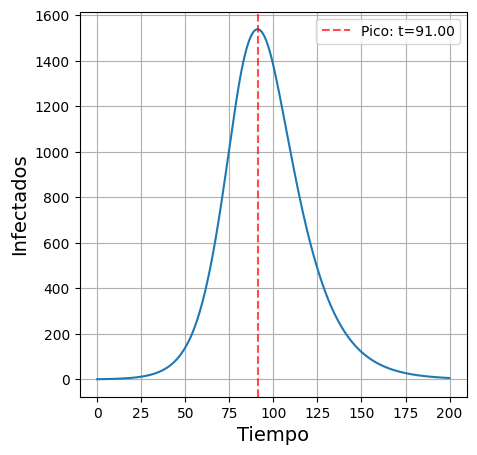

In [188]:
plt.figure(figsize=(5,5))
plt.plot(sol.t[:], sol.y[1, :])
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Infectados', fontsize=14)
peaks, _ = sp.signal.find_peaks(sol.y[1, :1000], height=0)
print(peaks) # [910]
pico = sol.t[:][peaks[0]]
plt.axvline(x=pico, color='red', linestyle='--', alpha=0.7, label=f'Pico: t={pico:.2f}')
plt.grid()
plt.legend()
plt.show()